In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme()

In [2]:
#import data
df_import = pd.read_csv('coffee-shop-sales-revenue.csv', 
                        delimiter= '|',
                        parse_dates=['transaction_date'],
                        index_col='transaction_id'
                        )

#inspect data
df_import.head()

,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
transaction_id,,,,,,,,,,
1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [3]:
#quick details about each feature 
df_import.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149116 entries, 1 to 149456
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_date  149116 non-null  datetime64[ns]
 1   transaction_time  149116 non-null  object        
 2   transaction_qty   149116 non-null  int64         
 3   store_id          149116 non-null  int64         
 4   store_location    149116 non-null  object        
 5   product_id        149116 non-null  int64         
 6   unit_price        149116 non-null  float64       
 7   product_category  149116 non-null  object        
 8   product_type      149116 non-null  object        
 9   product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 12.5+ MB


In [4]:
#look for missing data
df_import.isna().sum()

transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [5]:
#list all categories for filtering
df_import['product_category'].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [6]:
#filter data
categories = ['Coffee','Tea','Coffee beans','Loose Tea']

df_filtered = df_import[df_import['product_category'].isin(categories)].copy()
df_filtered['Product'] = np.where(df_filtered['product_category'].str.contains('Coffee', case=False),"Coffee","Tea")

df_filtered.head()

,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Product
transaction_id,,,,,,,,,,,
1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,Coffee
2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Tea
4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,Coffee
5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Tea
7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,Coffee


In [7]:
#aggregate transaction-level data into a daily-level view, rename columns to more easily understood labels

df = df_filtered.groupby(['transaction_date','Product'])['transaction_qty'].sum().reset_index()
df.rename(columns = {'transaction_date':"Date",'transaction_qty':'Quantity'},inplace=True)

df

,Date,Product,Quantity
0,2023-01-01,Coffee,375
1,2023-01-01,Tea,286
2,2023-01-02,Coffee,376
3,2023-01-02,Tea,274
4,2023-01-03,Coffee,365
...,...,...,...
357,2023-06-28,Tea,513
358,2023-06-29,Coffee,644
359,2023-06-29,Tea,485
360,2023-06-30,Coffee,668


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      362 non-null    datetime64[ns]
 1   Product   362 non-null    object        
 2   Quantity  362 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 8.6+ KB


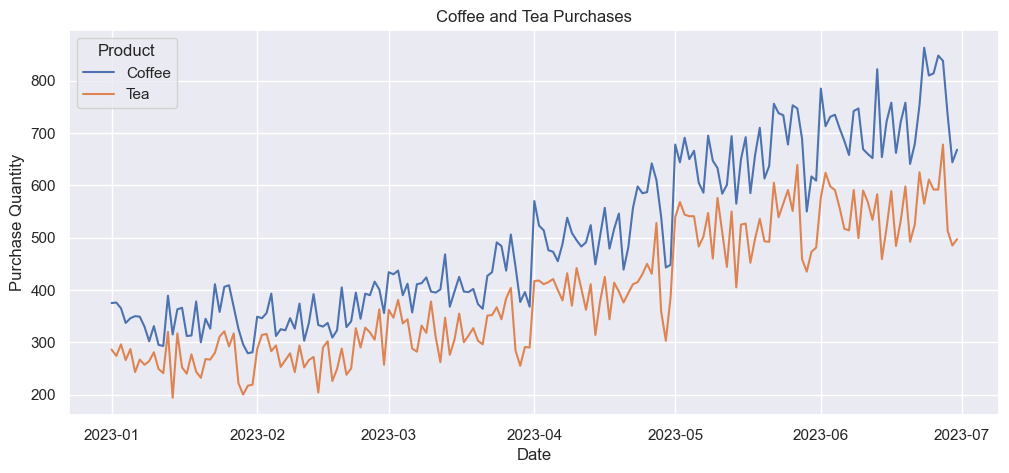

In [9]:
#visualize prepared data

fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=df,x='Date',y='Quantity',hue='Product',ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Purchase Quantity')
ax.set_title('Coffee and Tea Purchases')

plt.savefig("Images/coffee_and_tea.png") 

plt.show()

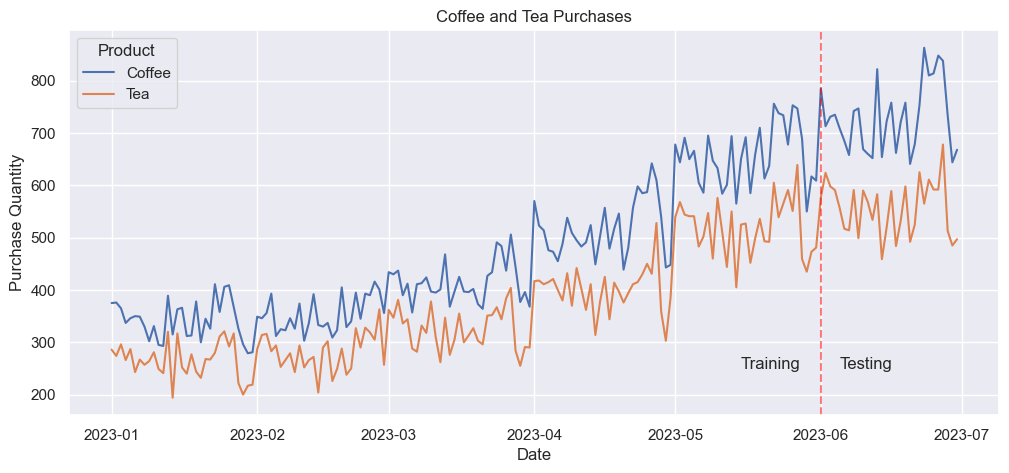

In [20]:
#visualize prepared data

fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=df,x='Date',y='Quantity',hue='Product',ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Purchase Quantity')
ax.set_title('Coffee and Tea Purchases')
ax.axvline(x = pd.to_datetime('2023-06-01'),linestyle = '--', c = 'red', alpha = 0.5)
ax.text(x = pd.to_datetime('2023-05-15'), y = 250, s = 'Training')
ax.text(x = pd.to_datetime('2023-06-05'), y = 250, s = 'Testing')

plt.savefig("Images/coffee_and_tea_with_split.png") 

plt.show()

In [11]:
#export prepared data for analysis

df.to_csv('prepared_data.csv',index=False)